# En este script se construye un algoritmo para resolver el problema de clasificación usando regresión logística

Y se aplica a los datos que leemos del archivo 

La implementación de la regresión logística tiene objetivo de tener apropiación de los conceptos en los algoritmos de aprendizaje.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#se leen los datos
Data = pd.read_csv('data.csv', header=None)
m, n = Data.shape

In [3]:
# se miran las primeras cinco filas para ver de que se trata 
Data.head()

,0,1,2
0,-2,0,0
1,-1,0,1
2,0,1,1
3,1,1,0
4,2,3,1


In [4]:
#Se observa que la última columna es la etiqueta y las dos primeras columnas son los atributos que se miden a cada fila
X = np.array(Data[[0,1]])
Y = np.array(Data[n-1])

In [5]:
X_clase0 = Data[ Data[2]==0 ][[0,1]]
X_clase1 = Data[ Data[2]==1 ][[0,1]]

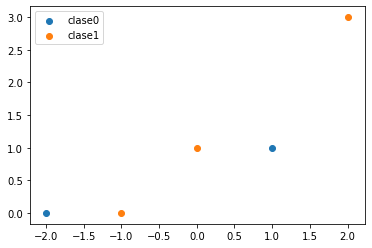

In [6]:
import matplotlib.pyplot as plt 
plt.scatter(X_clase0[0], X_clase0[1])
plt.scatter(X_clase1[0], X_clase1[1])
plt.legend(('clase0', 'clase1'))

La funciones que pueden servir para resolver el problema de clasificación son infinitas. 

Por lo tanto se debe hacer una restricción a una clase (conjunto) de funciones menor. Para este problema se va a fijar la clase de hipótesis a las funciones 

$$
h_{\theta}(x) = \frac{1}{1+\exp(-\theta \cdot x)} 
$$

En el caso general $\theta$ es un vector de tamaño igual al número de columnas de la matriz de datos $X$. Pero en el caso actual el vector $\theta$ es un vector con tres coordenadas. La función de pérdida para este problema es:

$$
L(\theta) = \frac{1}{m} \sum_{i=1}^m [ -y^{(i)} \log(h_{\theta}(x^{(i)})) - (1-y^{(i)}) \log(1- h_{\theta}(x^{(i)})) ]
$$

y el gradiente de la funcion de pérdida es un vector con la misma logitud que $\theta$ y cada elemento de este vector es tiene la siguiente forma

$$
\frac{\partial L (\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})\cdot x_j^{(i)}
$$

OBSERVE la similitud con la derivada de la función de costos para la regresión logística luce identica a la derivada de la función de costos de la regresión lineal. El diferencia si existe obviamente y se encuentra en la función de hipótesis $h_{\theta}$. 

https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-3/

In [7]:
def L(x):
    m,n = x.shape
    

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [10]:
# add a ones column - this makes the matrix multiplication work out easier
Data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = Data.shape[1]
X = Data.iloc[:,0:cols-1]
y = Data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [11]:
X.shape, theta.shape, y.shape

((5, 3), (3,), (5, 1))

In [12]:
cost(theta, X, y)

0.6931471805599453

In [13]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [14]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
cost(result[0], X, y)

0.5814800569098947

In [15]:
result

(array([-1.06224223, -0.55942129,  1.67827406]), 25, 1)

In [28]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    print(probability)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))


[[0.51414631]
 [0.37687797]
 [0.64931551]
 [0.51414886]
 [0.94551155]]
accuracy = 2%


#### Se grafica la frontera de decisión

Ya que $\;\;\;\; h_{\theta} (x) = g(\theta^T \cdot x) \geq 0\;\;$ cuando $\;\;\;\theta^T \cdot x \geq 0$

entonces en el caso de dos caracteríticas:

$$h_{\theta}(x)=g(\theta_0 + \theta_1 x_1 + \theta_2 x_2) $$

y

$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 \geq 0 $$

se puede reordenar esta última expresión para resolver para la ecuación lineal:

$$
x_2 = \frac{-\theta_1 x_1 - \theta_0}{\theta_2}
$$

In [17]:
#calculemos los parametros de esa recta 
pendiente   = -result[0][1]/result[0][2]
interceptoy = -result[0][0]/result[0][2]
print(pendiente, interceptoy)

0.33333130828479396 0.6329372897807111


La ecuación de la línea es entonces $ x_2 = -1.023 x_1 + 124.887 $

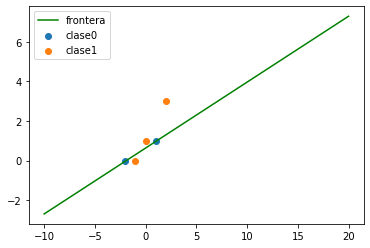

In [25]:
domi = np.linspace(20,-10,10)
frontera = pendiente*domi + interceptoy
import matplotlib.pyplot as plt 
plt.scatter(X_clase0[0], X_clase0[1])
plt.scatter(X_clase1[0], X_clase1[1])
plt.plot(domi, frontera, color='green')
plt.legend(('frontera', 'clase0', 'clase1'))